In [114]:
%matplotlib inline
import os
from cca_zoo.models import CCA
from cca_zoo.data import generate_covariance_data
from cca_zoo.models import rCCA
from cca_zoo.model_selection import GridSearchCV
from cca_zoo.deepmodels import architectures
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
os.chdir('../raw_data')

#### Functions to load and or write to pickle files

In [110]:
class Files:
    def __init__(self, filename):
        self.file = filename
        
    def write_to_file(self, data):
        with open(self.file, 'wb') as f:
            pickle.dump(data, f) 
        return None
    
    def load_pickle(self):
        data = pd.read_pickle(self.file)
        return data
    
    def load_csv(self, sep, usecols=None):
        data = pd.read_csv(self.file, sep=sep, usecols=usecols)
        return data
        
        
    

In [212]:
os.listdir()

['ALL_GNPS.json',
 'ALL_GNPS_15_12_2021_positive_annotated.pickle',
 'ALL_GNPS_15_12_2021_positive_annotated_classifications.txt',
 'model_300dim.pkl',
 'mol2vec_embedding.pickle',
 'ms2ds_embeddings_unique_GNPS_15_12_2021.pickle',
 'ms2ds_model_GNPS_15_12_2021.hdf5',
 'spec2vec_embeddings_unique_GNPS_15_12_2021.pickle',
 'spec2vec_model_GNPS_15_12_2021.model',
 'spec2vec_model_GNPS_15_12_2021.model.syn1neg.npy',
 'spec2vec_model_GNPS_15_12_2021.model.wv.vectors.npy',
 'spectra_unique_GNPS_15_12_2021.pickle']

In [177]:
#load spec2vec embeddings
path_spec2vec = './spec2vec_embeddings_unique_GNPS_15_12_2021.pickle'
spec2vec = Files(path_spec2vec).load_pickle()#[:10000]
len(spec2vec)


20889

In [213]:
path_ms2ds = './ms2ds_embeddings_unique_GNPS_15_12_2021.pickle'
ms2ds = Files(path_ms2ds).load_pickle()#[:10000]
len(ms2ds)


20889

In [178]:

#load mol2vec embeddings
path_mol2vec = './mol2vec_embedding.pickle'
mol2vec = Files(path_mol2vec).load_pickle()#[:10000]
len(mol2vec)

20889

In [222]:
#split the dataset
x_train, x_test, y_train, y_test = \
train_test_split(ms2ds, mol2vec, test_size=0.2, random_state=42)

In [223]:
#init CCA
latent_dims=300
linear_cca = CCA(latent_dims=latent_dims)

In [224]:
#fit and transform
train_z1, train_z2 = linear_cca.fit_transform([x_train, y_train])

C:\Users\lmeli\AppData\Local\Programs\Python\Python39\lib\site-packages\cca_zoo\models\_rcca.py:123: RuntimeWarning: invalid value encountered in sqrt
  / np.sqrt(eigvals[idx])


In [225]:
# extract correlation between the views
train_cor=linear_cca.score([x_train, y_train])
len(train_cor)

300

In [226]:
# transform the test dataset
test_z1, test_z2 = linear_cca.transform([x_test,y_test])
test_cor = linear_cca.score([x_test, y_test])

In [227]:
# create a train pd for plotting
dims = [i for i in range(1,latent_dims+1)]
dims
train_cor_df = pd.DataFrame(list(zip(dims,train_cor)),\
                      columns=['latent_dim','cor']) 
train_cor_df.head()

,latent_dim,cor
0,1,0.899808
1,2,0.844028
2,3,0.806704
3,4,0.797919
4,5,0.753063


In [228]:
# create a test pd for plotting
dims = [i for i in range(1,latent_dims+1)]

test_cor_df = pd.DataFrame(list(zip(dims,test_cor)),\
                      columns=['latent_dim','cor']) 
test_cor_df.head()

,latent_dim,cor
0,1,0.889260
1,2,0.826607
2,3,0.769665
3,4,0.785805
4,5,0.740144


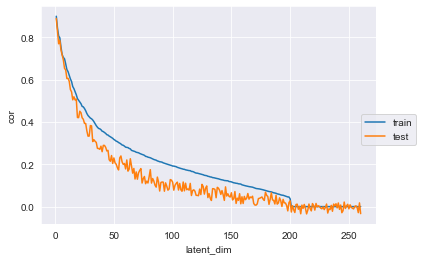

In [229]:
fig, ax = plt.subplots()
sns.set_style('darkgrid')
dfs = [train_cor_df,test_cor_df]
for df in dfs:
    sns.lineplot(data = df, x='latent_dim',y='cor',ax=ax)
fig.legend(labels=['train', 'test'], loc='center right')
plt.show()
